In [1]:
from NoisyCircuits.utils.BuildQubitGateModelParallel import BuildModel
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open("../noise_models/Noise_Model_Heron_QPU.pkl", "rb") as f:
    noise_model = pickle.load(f)

2026-02-05 12:57:16,862	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
vals = BuildModel(
            noise_model=noise_model,
            num_qubits=2,
            num_cores=2,
            threshold=1e-15,
            basis_gates=[["sx", "x", "rz", "rx"], ["cz", "rzz"]],
            verbose=False).build_qubit_gate_model()

In [4]:
import time

In [6]:
data = {
    "qubits" : [],
    "single_qubit_extraction_time" : [[], []],
    "two_qubit_extraction_time" : [[], []],
    "measurement_extraction_time" : [[], []],   
    "single_qubit_error_postprocessing_time": [[], []],
    "two_qubit_error_postprocessing_time": [[], []],
    "two_qubit_error_operator_construction_time": [[], []],
    "connectivity_map_construction_time": [[], []],
}

trial_data = {"qubits":[], "Mean":[], "Std": []}

for qubits in range(2, 13):
    time_list = []
    for _ in range(3):
        t0 = time.perf_counter_ns()
        vals = BuildModel(
            noise_model=noise_model,
            num_qubits=qubits,
            num_cores=2,
            threshold=1e-15,
            basis_gates=[["sx", "x", "rz", "rx"], ["cz", "rzz"]],
            verbose=False).build_qubit_gate_model()
        t1 = time.perf_counter_ns()
        time_list.append(t1-t0)
    trial_data["qubits"].append(qubits)
    trial_data["Mean"].append(np.mean(time_list))
    trial_data["Std"].append(np.std(time_list))
    print(f"Completed data for {qubits} qubits.")
    print("Mean Runtimes: ")
    print(f"Mean for Extraction for {qubits} Qubits: {trial_data['Mean'][-1]/1e9:.5f} seconds")

Completed data for 2 qubits.
Mean Runtimes: 
Mean for Extraction for 2 Qubits: 0.11833 seconds
Completed data for 3 qubits.
Mean Runtimes: 
Mean for Extraction for 3 Qubits: 0.21478 seconds
Completed data for 4 qubits.
Mean Runtimes: 
Mean for Extraction for 4 Qubits: 0.34391 seconds
Completed data for 5 qubits.
Mean Runtimes: 
Mean for Extraction for 5 Qubits: 0.54216 seconds
Completed data for 6 qubits.
Mean Runtimes: 
Mean for Extraction for 6 Qubits: 0.65212 seconds
Completed data for 7 qubits.
Mean Runtimes: 
Mean for Extraction for 7 Qubits: 0.89176 seconds
Completed data for 8 qubits.
Mean Runtimes: 
Mean for Extraction for 8 Qubits: 1.14268 seconds
Completed data for 9 qubits.
Mean Runtimes: 
Mean for Extraction for 9 Qubits: 1.22854 seconds
Completed data for 10 qubits.
Mean Runtimes: 
Mean for Extraction for 10 Qubits: 2.32339 seconds
Completed data for 11 qubits.
Mean Runtimes: 
Mean for Extraction for 11 Qubits: 4.79930 seconds
Completed data for 12 qubits.
Mean Runtimes: 


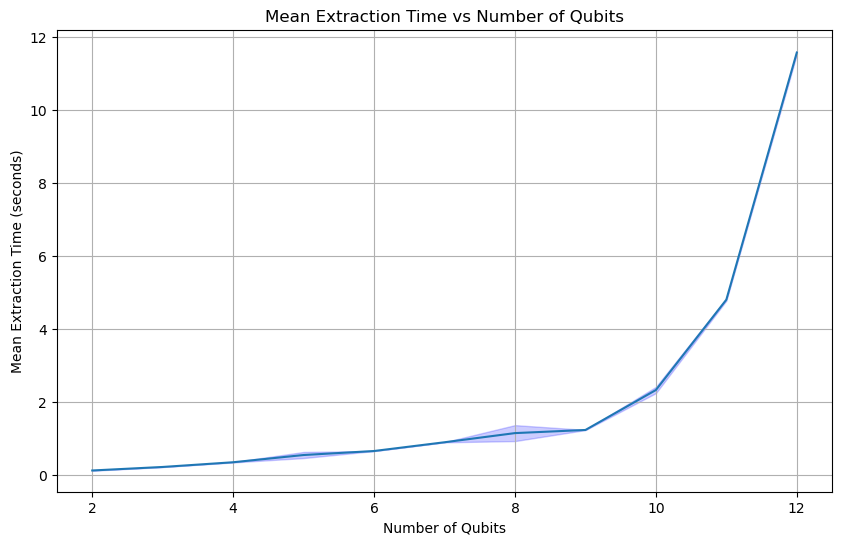

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(trial_data["qubits"], np.array(trial_data["Mean"])*1e-9)
plt.fill_between(trial_data["qubits"], 
                 (np.array(trial_data["Mean"])-np.array(trial_data["Std"]))*1e-9, 
                 (np.array(trial_data["Mean"])+np.array(trial_data["Std"]))*1e-9, 
                 color='blue', alpha=0.2)
plt.xlabel("Number of Qubits")
plt.ylabel("Mean Extraction Time (seconds)")
plt.title("Mean Extraction Time vs Number of Qubits")
plt.grid()
plt.show()

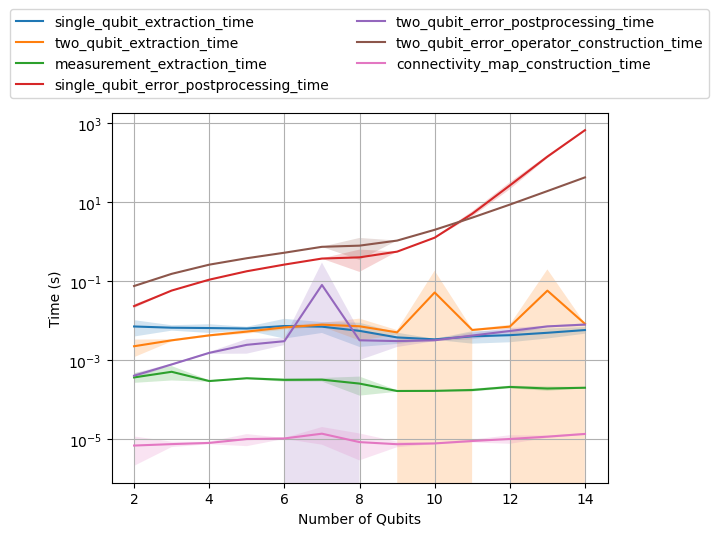

In [4]:
key_names = list(data.keys())
key_names.pop(0)
for key in key_names:
    plt.semilogy(data["qubits"], np.array(data[key][0])/1e9, label=key)
    plt.fill_between(data["qubits"], 
                     np.array(data[key][0])/1e9 - 2*np.array(data[key][1])/1e9,
                     np.array(data[key][0])/1e9 + 2*np.array(data[key][1])/1e9, alpha=0.2)
plt.xlabel("Number of Qubits")
plt.ylabel("Time (s)")
plt.grid()
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2)
plt.show()